## Import Important Libraries

In [69]:
import numpy as np

from qiskit.circuit.library import QFT
import qiskit.visualization as qv
from qiskit import IBMQ, Aer, QuantumCircuit, transpile, assemble
from qiskit.providers.ibmq import least_busy
from qiskit.quantum_info import Statevector
from qiskit.tools.monitor import job_monitor

import matplotlib.style
import matplotlib as plt
plt.style.use("dark_background")

#### Defining the QFT and Inverse QFT Circuit Function

In [70]:
def myQFT(n):
    circuit = QuantumCircuit(n)
    for i in range(n):
        circuit.h(n-1-i)
        for j in range(i+1, n):
            circuit.cu(0, 0, np.pi/(2**(j-i)),0 , n-1-j, n-1-i)
        circuit.barrier() 

    for k in range(0, int(n/2)):
        circuit.swap(k, n-1-k) 

    return circuit

myQFT(4).draw()

░      »
q_0: ────────────────────────────────────────────■─────────░──────»
                                                 │         ░      »
q_1: ────────────────────────────■───────────────┼─────────░──────»
                                 │               │         ░ ┌───┐»
q_2: ────────────■───────────────┼───────────────┼─────────░─┤ H ├»
     ┌───┐┌──────┴───────┐┌──────┴───────┐┌──────┴───────┐ ░ └───┘»
q_3: ┤ H ├┤ U(0,0,π/2,0) ├┤ U(0,0,π/4,0) ├┤ U(0,0,π/8,0) ├─░──────»
     └───┘└──────────────┘└──────────────┘└──────────────┘ ░      »
«                                      ░                       ░ ┌───┐ ░       
«q_0: ───────────────────────■─────────░─────────────■─────────░─┤ H ├─░──X────
«                            │         ░ ┌───┐┌──────┴───────┐ ░ └───┘ ░  │    
«q_1: ───────■───────────────┼─────────░─┤ H ├┤ U(0,0,π/2,0) ├─░───────░──┼──X─
«     ┌──────┴───────┐┌──────┴───────┐ ░ └───┘└──────────────┘ ░       ░  │  │ 
«q_2: ┤ U(0,0,π/2,0) ├┤ U(0,0,π/4,0) ├─░───────────────────────░───────░──┼──X─
«     └──────────────┘└──────────────┘ ░                       ░       ░  │    
«q_3: ─────────────────────────────────░───────────────────────░───────░──X────
«                                      ░                       ░       ░

In [71]:
def InvQFT(n):
    circuit = QuantumCircuit(n)
    for k in range(0, int(n/2)):
        circuit.swap(k, n-1-k) 
    circuit.barrier()
    for i in range(n):
        circuit.h(i)
        for j in range(i+1, n):
            circuit.cu(0, 0, -np.pi/(2**(j-i)),0 ,j, i)
        circuit.barrier() 
    return circuit

InvQFT(4).draw()

░ ┌───┐┌───────────────┐┌───────────────┐┌───────────────┐ ░      »
q_0: ─X─────░─┤ H ├┤ U(0,0,-π/2,0) ├┤ U(0,0,-π/4,0) ├┤ U(0,0,-π/8,0) ├─░──────»
      │     ░ └───┘└───────┬───────┘└───────┬───────┘└───────┬───────┘ ░ ┌───┐»
q_1: ─┼──X──░──────────────■────────────────┼────────────────┼─────────░─┤ H ├»
      │  │  ░                               │                │         ░ └───┘»
q_2: ─┼──X──░───────────────────────────────■────────────────┼─────────░──────»
      │     ░                                                │         ░      »
q_3: ─X─────░────────────────────────────────────────────────■─────────░──────»
            ░                                                          ░      »
«                                        ░                        ░       ░ 
«q_0: ───────────────────────────────────░────────────────────────░───────░─
«     ┌───────────────┐┌───────────────┐ ░                        ░       ░ 
«q_1: ┤ U(0,0,-π/2,0) ├┤ U(0,0,-π/4,0) ├─░────────────────────────░───────░─
«     └───────┬───────┘└───────┬───────┘ ░ ┌───┐┌───────────────┐ ░       ░ 
«q_2: ────────■────────────────┼─────────░─┤ H ├┤ U(0,0,-π/2,0) ├─░───────░─
«                              │         ░ └───┘└───────┬───────┘ ░ ┌───┐ ░ 
«q_3: ─────────────────────────■─────────░──────────────■─────────░─┤ H ├─░─
«                                        ░                        ░ └───┘ ░

Computational Basis: 001
Computational Basis:


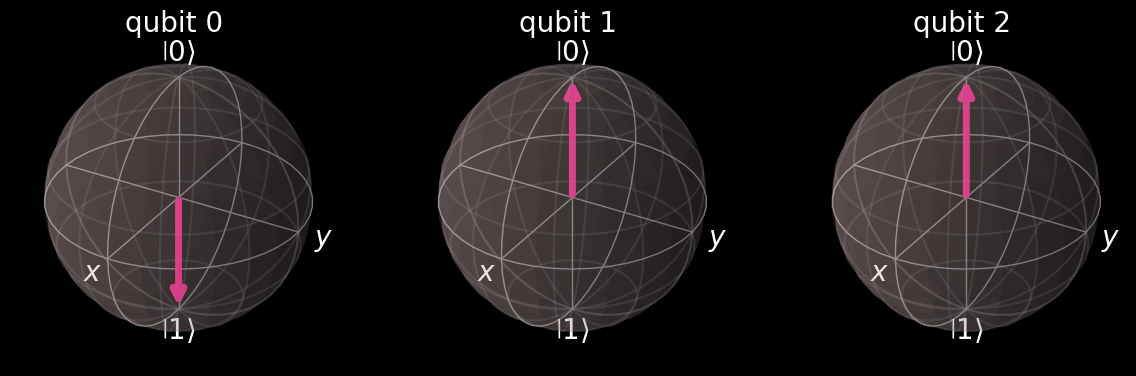

Inverse QFT Basis:


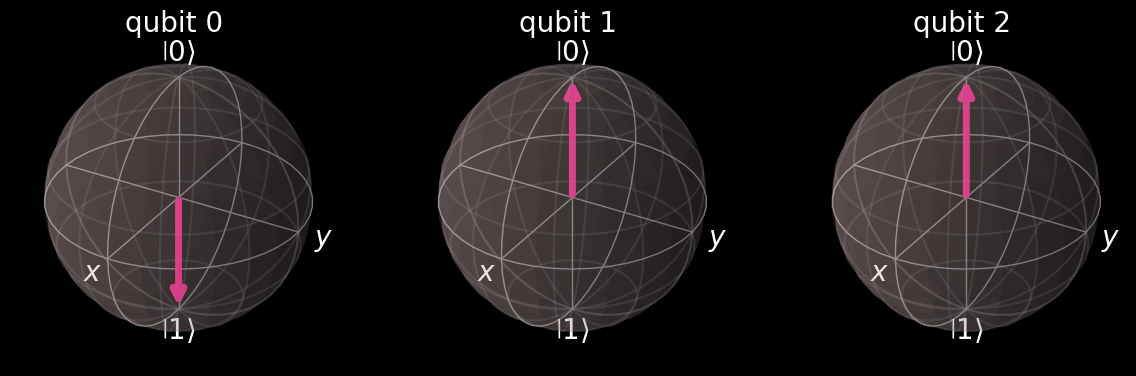

In [72]:
state = "001"; print("Computational Basis:", state)
circuit = QuantumCircuit(len(state))
circuit.initialize(Statevector.from_label(state).data)

print("Computational Basis:") ; display(qv.plot_bloch_multivector(Statevector.from_instruction(circuit).data))
circuit.append(myQFT(len(state)), circuit.qubits)
circuit.append(InvQFT(len(state)), circuit.qubits)
print("Inverse QFT Basis:") ; display(qv.plot_bloch_multivector(Statevector.from_instruction(circuit).data))